# Homework DSP Discrete Signal Processing (2019/01/14締切)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li></ul></li><li><span><a href="#Sample-1" data-toc-modified-id="Sample-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sample 1</a></span><ul class="toc-item"><li><span><a href="#stem(x)" data-toc-modified-id="stem(x)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>stem(x)</a></span></li><li><span><a href="#specgram(x)" data-toc-modified-id="specgram(x)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>specgram(x)</a></span><ul class="toc-item"><li><span><a href="#matplotlib.pyplot.specgram" data-toc-modified-id="matplotlib.pyplot.specgram-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>matplotlib.pyplot.specgram</a></span></li><li><span><a href="#TODO-自作spectgram" data-toc-modified-id="TODO-自作spectgram-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>TODO 自作spectgram</a></span></li></ul></li><li><span><a href="#power-spectrum-(x)" data-toc-modified-id="power-spectrum-(x)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>power spectrum (x)</a></span></li></ul></li><li><span><a href="#Sample-2" data-toc-modified-id="Sample-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sample 2</a></span><ul class="toc-item"><li><span><a href="#Convolve(x,h)" data-toc-modified-id="Convolve(x,h)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Convolve(x,h)</a></span></li><li><span><a href="#stem(y)" data-toc-modified-id="stem(y)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>stem(y)</a></span></li><li><span><a href="#specgram(y)" data-toc-modified-id="specgram(y)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>specgram(y)</a></span></li><li><span><a href="#power-spectrum-(y)" data-toc-modified-id="power-spectrum-(y)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>power spectrum (y)</a></span><ul class="toc-item"><li><span><a href="#np.fft.fft" data-toc-modified-id="np.fft.fft-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>np.fft.fft</a></span></li><li><span><a href="#np.fft.rfft" data-toc-modified-id="np.fft.rfft-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>np.fft.rfft</a></span></li></ul></li><li><span><a href="#matlab-wavewrite" data-toc-modified-id="matlab-wavewrite-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>matlab wavewrite</a></span></li></ul></li><li><span><a href="#Sample-3" data-toc-modified-id="Sample-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sample 3</a></span></li><li><span><a href="#Sample-4" data-toc-modified-id="Sample-4-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sample 4</a></span></li><li><span><a href="#Sample-5" data-toc-modified-id="Sample-5-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sample 5</a></span></li><li><span><a href="#END" data-toc-modified-id="END-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>END</a></span></li></ul></div>

## Config

### Import

In [270]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

seed=0
np.random.seed(seed)

## Sample 1

- 階差数列を実現するLTIシステム
  - $h[n] = \delta[n] - \delta[n-1]$
- 入力信号$x[n]$に対する畳み込み$x[n]*h[n]$を考える

畳み込みの復習

\begin{align*}
x[n]*h[n] := \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k]
\end{align*}

- サンプリング周波数:16kHz

\begin{align*}
x = \sin \left( 2 \pi f t \right)
\end{align*}

In [271]:
fs = 16000              # サンプリング周波数:16kHz
t = np.arange(fs) / fs  # 離散時間 (１秒間)

freq = 1000                 # frequency
x = np.sin(2*np.pi*freq*t)  # 波形

In [272]:
# 音声ファイル作成
from scipy.io import wavfile

_wave_file = "./sample01_x.wav"
_x = np.float32(x)
wavfile.write(filename=_wave_file,
              rate=fs,  # サンプリング周波数
              data=_x)

### stem(x)

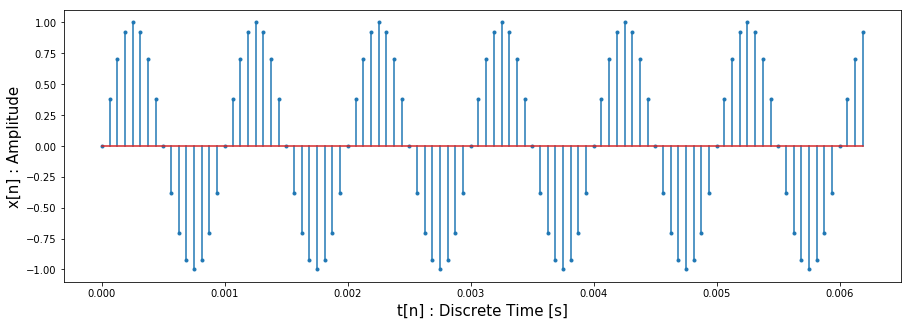

In [273]:
idx_start = 0
idx_end   = 100

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.stem(t[idx_start:idx_end], x[idx_start:idx_end],
        linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="x[n] : Amplitude", fontsize=15)
plt.show()

### specgram(x)

- [スペクトログラム - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B9%E3%83%9A%E3%82%AF%E3%83%88%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0)
  - > スペクトログラムを作成する方法は主に2種類存在する.
      1つはバンドパスフィルタ群を使う方法,もう1つは短時間フーリエ変換(STFT)で計算する方法である.
- [matplotlib.pyplot.specgram — Matplotlib 3.0.2 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.specgram.html)
  - > data in x. Data are split into NFFT length segments and the spectrum of each section is computed
  - > The windowing function window is applied to each segment
- [Spectrogram Demo — Matplotlib 3.0.2 documentation](https://matplotlib.org/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py)
- [短時間フーリエ変換(STFT) - numpyでスペクトログラムによる音楽信号の可視化 - Qiita](https://qiita.com/namaozi/items/dec1575cd455c746f597#%E7%9F%AD%E6%99%82%E9%96%93%E3%83%95%E3%83%BC%E3%83%AA%E3%82%A8%E5%A4%89%E6%8F%9Bstft)
- [ハミング窓 - 窓関数 - Wikipedia](https://ja.wikipedia.org/wiki/%E7%AA%93%E9%96%A2%E6%95%B0#%E3%83%8F%E3%83%9F%E3%83%B3%E3%82%B0%E7%AA%93)
  - > ハン窓と並び、最もよく使われる窓関数の一つ。ハン窓より周波数分解能が良く、ダイナミック・レンジが狭い。区間の両端で不連続なのが特徴。
  - > $w(x) = 0.54 - 0.46 \cdot \cos \left( 2 \pi x \right) \ \ (\text{if} 0 < x \lt 1)$
- [matplotlib.mlab.window_hanning(x) — Matplotlib 3.0.2 documentation](https://matplotlib.org/api/mlab_api.html#matplotlib.mlab.window_hanning)

縦軸の$max$は標本化周波数$fs$の$1/2$


#### matplotlib.pyplot.specgram

_spectrum.shape: (129, 124)
_freqs.shape   : (129,)
_t.shape       : (124,)
_spectrum[0,:4]: [9.58937834e-14 9.58937834e-14 9.58937833e-14 9.58937833e-14]
_freqs[:4]     : [  0.   62.5 125.  187.5]
_t[:4]         : [0.008 0.016 0.024 0.032]


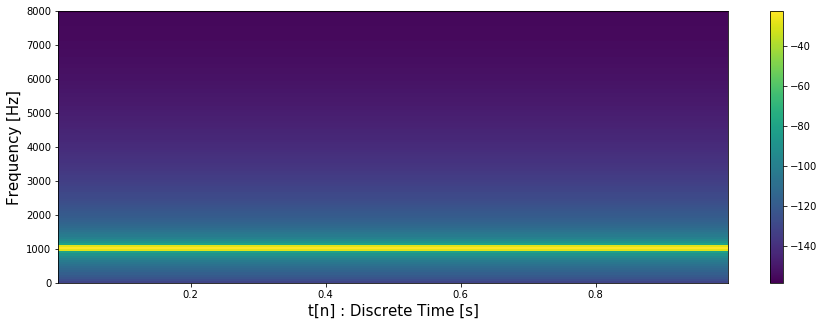

In [274]:
# 波形xのspectgram

idx_start = 0
idx_end   = len(x)
NFFT      = 256
noverlap  = NFFT / 2

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

# specgram : STFT (short-time fourier transform) の計算をしているだけ
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=x[idx_start:idx_end],  # data
                NFFT=NFFT,               # The number of data points used in each block for the FFT.
                Fs=fs,                   # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                noverlap=128)            # STFTのずらし幅
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="Frequency [Hz]", fontsize=15)
fig.colorbar(mappable=_im, ax=ax)

print("="*40)
print("_spectrum.shape: {}".format(_spectrum.shape))
print("_freqs.shape   : {}".format(_freqs.shape))
print("_t.shape       : {}".format(_t.shape))
print("="*40)
print("_spectrum[0,:4]: {}".format(_spectrum[0,:4]))
print("_freqs[:4]     : {}".format(_freqs[:4]))
print("_t[:4]         : {}".format(_t[:4]))
print("="*40)

plt.show()

_spectrum.shape: (129, 6)
_freqs.shape   : (129,)
_t.shape       : (6,)
_spectrum[0,:4]: [1.08303240e-14 1.08303240e-14 1.08303241e-14 1.08303239e-14]
_freqs[:4]     : [  0.   62.5 125.  187.5]
_t[:4]         : [0.008 0.016 0.024 0.032]


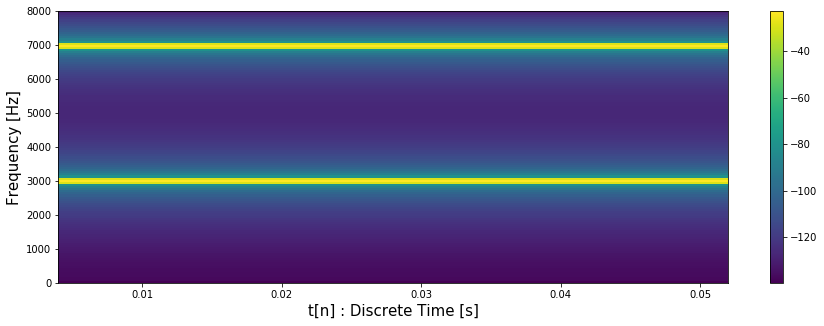

In [275]:
# 3kHz, 7kHz の周波数波形のspectgram

idx_start = 0
idx_end   = 1000
NFFT      = 256
_x        = np.sin(2*np.pi*3000*t) + np.sin(2*np.pi*7000*t)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=_x[idx_start:idx_end], # data
                NFFT=NFFT,               # The number of data points used in each block for the FFT.
                Fs=fs,                   # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                noverlap=128)            # STFTのずらし幅
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="Frequency [Hz]", fontsize=15)
fig.colorbar(mappable=_im, ax=ax)

print("="*40)
print("_spectrum.shape: {}".format(_spectrum.shape))
print("_freqs.shape   : {}".format(_freqs.shape))
print("_t.shape       : {}".format(_t.shape))
print("="*40)
print("_spectrum[0,:4]: {}".format(_spectrum[0,:4]))
print("_freqs[:4]     : {}".format(_freqs[:4]))
print("_t[:4]         : {}".format(_t[:4]))
print("="*40)

plt.show()

#### TODO 自作spectgram
- STFT short-time fourier transform

### power spectrum (x)

In [276]:
# 普通の高速フーリエ変換なのでサンプリング周期分だけ返す
x_fourier = np.fft.fft(a=x)
print("x_fourier[0].shape: {}".format(x_fourier.shape))
print("x_fourier[0]      : {}".format(x_fourier[0]))

x_fourier[0].shape: (16000,)
x_fourier[0]      : (2.661322692627543e-12+0j)


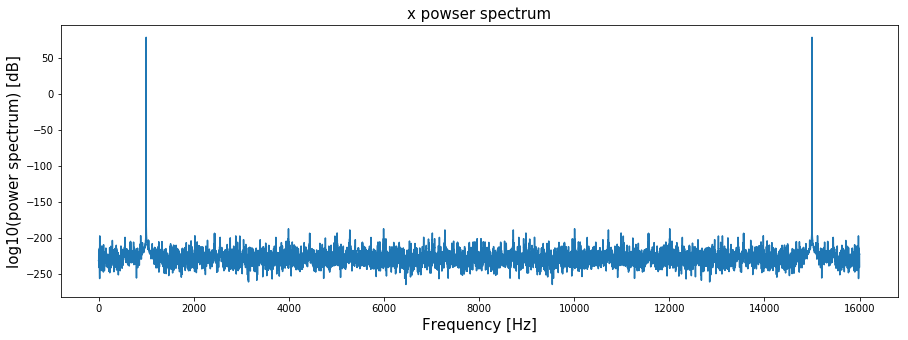

In [277]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(len(x_fourier)),
        20*np.log10(abs(x_fourier)))
ax.set_title(label="x powser spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
plt.show()

In [278]:
# rfft は入力信号が実数のみのときに使う
# よって,軸で左右対称なのでサンプリング周波数の半分のみ返せば十分)
x_fourier = np.fft.rfft(a=x)
print("x_fourier[0].shape: {}".format(x_fourier.shape))
print("x_fourier[0]      : {}".format(x_fourier[0]))

x_fourier[0].shape: (8001,)
x_fourier[0]      : (2.765683656942296e-12+0j)


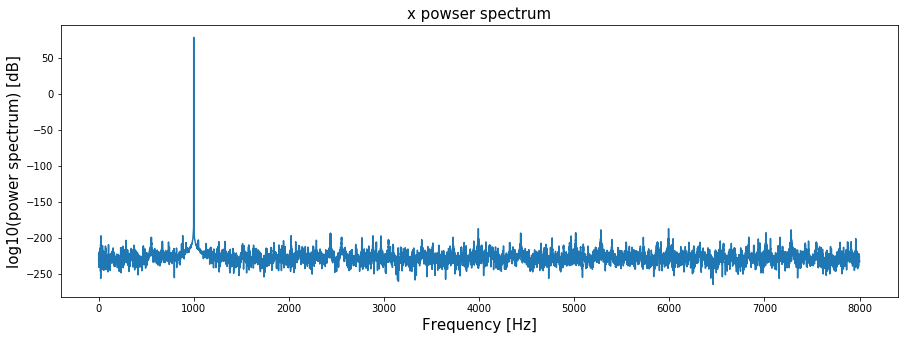

In [279]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(len(x_fourier)),
        20*np.log10(abs(x_fourier)))
ax.set_title(label="x powser spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
plt.show()

## Sample 2


### Convolve(x,h)

- [畳み込み積分や移動平均を求めるnumpy.convolve関数の使い方 - DeepAge](https://deepage.net/features/numpy-convolve.html)
- [numpy.convolve — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.convolve.html)
  - $(a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m]$


\begin{align*}
h[n] = \delta[n] - \delta[n-1]
\end{align*}


> - mode : {‘full’, ‘valid’, ‘same’}, optional
    - __'full'__ : By default, mode is 'full'.
      This returns the convolution at each point of overlap, with an output shape of (N+M-1,).
      At the end-points of the convolution, the signals do not overlap completely,
      and boundary effects may be seen.
    - __'same'__ : Mode 'same' returns output of length max(M, N). Boundary effects are still visible.
    - __'valid'__ : Mode 'valid' returns output of length max(M, N) - min(M, N) + 1.
      The convolution product is only given for points where the signals overlap completely.
      Values outside the signal boundary have no effect.

In [280]:
h = np.array([1, -1])
y = np.convolve(a=x, v=h, mode="full")

print("x.shape: {}".format(x.shape))
print("y.shape: {} = {} + {} - 1".format(y.shape, x.shape[0], h.shape[0] ))


# 後ほど左端は描画した時にグラフを歪めるので取り除く(比較する)
print("y[0]  : {}".format(y[0] ))
print("y[1]  : {}".format(y[1] ))
print("y[-2] : {}".format(y[-2]))
print("y[-1] : {}".format(y[-1]))
# h のサイズが2なので両端ひとつずつだが,
# サンプリング周波数と合わせるために先頭のみtrtimmingする
y_trim_left = y[1:]
print("y_trim_left.shape: {}".format(y_trim_left.shape))

x.shape: (16000,)
y.shape: (16001,) = 16000 + 2 - 1
y[0]  : 0.0
y[1]  : 0.3826834323650898
y[-2] : 0.3244233488222904
y[-1] : 0.3826834323650916
y_trim_left.shape: (16000,)


### stem(y)
- 階差数列をとる $\simeq$ 微分する
- $\sin(x)$の階差 $\simeq$  $\cos(x)$


- LTI (linear time-invariant system) なので
  - 周波数は不変
  - 位相は変化 ($\pi$だけ変化)
  - 振幅は変化

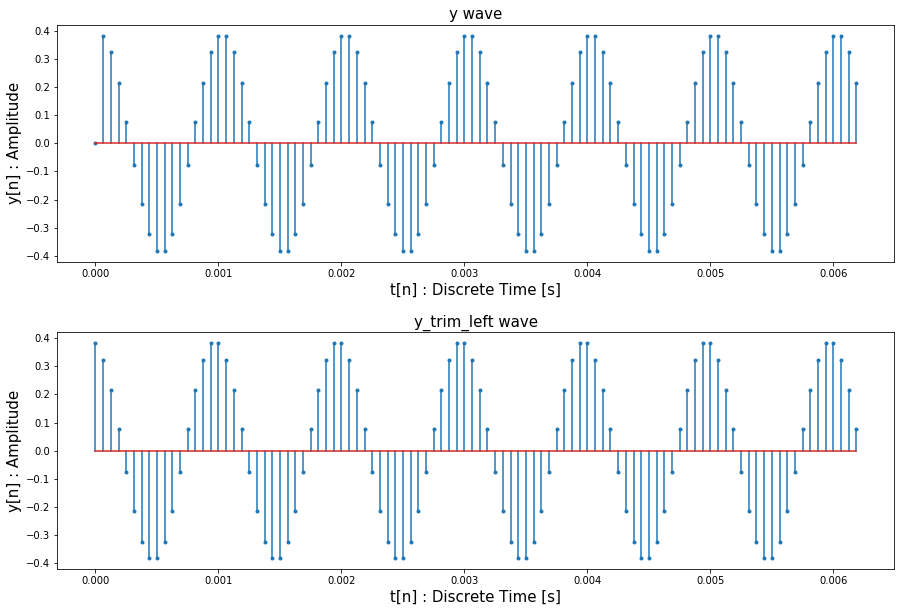

In [281]:
idx_start = 0
idx_end   = 100
################################################################################
fig = plt.figure(figsize=(15, 10))
nrow = 2
ncol = 1
########################################
ax1 = fig.add_subplot(nrow, ncol, 1)
ax1.stem(t[idx_start:idx_end], y[idx_start:idx_end],
         linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax1.set_title(label="y wave", fontsize=15)
ax1.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax1.set_ylabel(ylabel="y[n] : Amplitude", fontsize=15)
########################################
ax2 = fig.add_subplot(nrow, ncol, 2)
ax2.stem(t[idx_start:idx_end], y_trim_left[idx_start:idx_end],
         linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax2.set_title(label="y_trim_left wave", fontsize=15)
ax2.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax2.set_ylabel(ylabel="y[n] : Amplitude", fontsize=15)
########################################
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

### specgram(y)
- LTI (linear time-invariant system) なので, 周波数は変わっていないことがわかる

_spectrum.shape: (129, 124)
_freqs.shape   : (129,)
_t.shape       : (124,)
_spectrum[0,:4]: [3.27401856e-13 3.27401856e-13 3.27401856e-13 3.27401856e-13]
_freqs[:4]     : [  0.   62.5 125.  187.5]
_t[:4]         : [0.008 0.016 0.024 0.032]
_spectrum.min(axis=None)       : 3.4527474721374175e-18
_spectrum.argmin(axis=0)[:4]   : [128 128 128 128]
10*np.log10(abs(_spectrum.min)): -174.6183518402174
_spectrum.shape: (129, 124)
_freqs.shape   : (129,)
_t.shape       : (124,)
_spectrum[0,:4]: [3.83575133e-13 3.83575133e-13 3.83575133e-13 3.83575133e-13]
_freqs[:4]     : [  0.   62.5 125.  187.5]
_t[:4]         : [0.008 0.016 0.024 0.032]
_spectrum.min(axis=None)       : 3.403735012825546e-35
_spectrum.argmin(axis=0)[:4]   : [128 128 128 128]
10*np.log10(abs(_spectrum.min)): -344.68044257913897


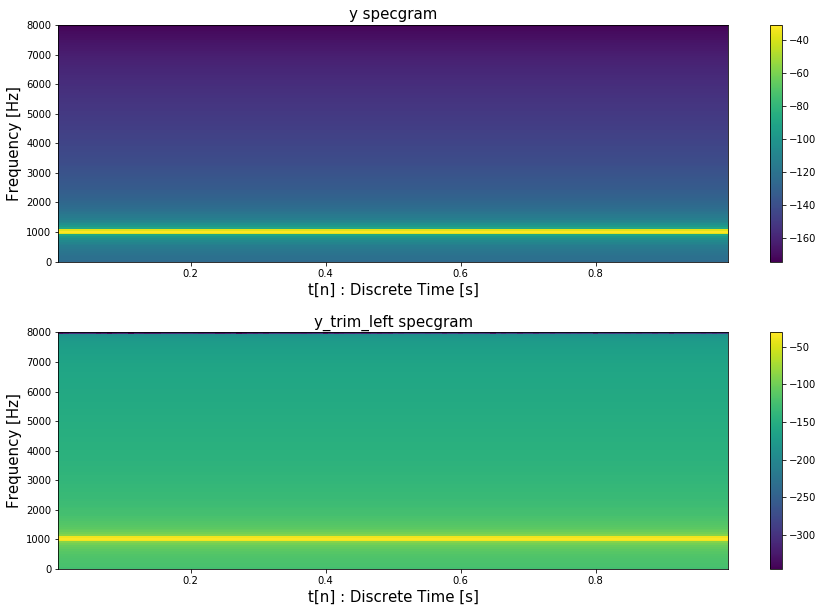

In [292]:
# 畳み込み処理のmodeをfullで行ったためyの両端の値が少しおかしくなる.
# そこでそれらを取り除いたものと取り除かなかったものを比べてみた.
# このプロットの差は何から来ているのだろうか.

idx_start = 0
idx_end   = fs
NFFT      = 256
noverlap  = NFFT / 2
################################################################################
fig = plt.figure(figsize=(15, 10))
nrow, ncol = 2, 1
########################################
# specgram : STFT (short-time fourier transform) の計算をしているだけ
ax = fig.add_subplot(nrow, ncol, 1)
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=y[idx_start:idx_end],  # data
                NFFT=NFFT,  # The number of data points used in each block for the FFT.
                Fs=fs,      # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                mode='psd',    # power spectrum density (default)
                noverlap=128)            # STFTのずらし幅
ax.set_title(label="y specgram", fontsize=15)
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="Frequency [Hz]", fontsize=15)
fig.colorbar(mappable=_im, ax=ax)
print("="*40)
print("_spectrum.shape: {}".format(_spectrum.shape))
print("_freqs.shape   : {}".format(_freqs.shape))
print("_t.shape       : {}".format(_t.shape))
print("="*40)
print("_spectrum[0,:4]: {}".format(_spectrum[0,:4]))
print("_freqs[:4]     : {}".format(_freqs[:4]))
print("_t[:4]         : {}".format(_t[:4]))
print("="*40)
print("_spectrum.min(axis=None)       : {}".format(_spectrum.min(axis=None)))
print("_spectrum.argmin(axis=0)[:4]   : {}".format(_spectrum.argmin(axis=0)[:4]))
print("10*np.log10(abs(_spectrum.min)): {}".format(10*np.log10(abs(_spectrum.min(axis=None)))))
print("="*40)
########################################
ax = fig.add_subplot(nrow, ncol, 2)
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=y_trim_left[idx_start:idx_end],  # data
                NFFT=NFFT,  # The number of data points used in each block for the FFT.
                Fs=fs,      # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                mode='psd',    # power spectrum density (default)
                noverlap=128)            # STFTのずらし幅
ax.set_title(label="y_trim_left specgram", fontsize=15)
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="Frequency [Hz]", fontsize=15)
fig.colorbar(mappable=_im, ax=ax)
print("="*40)
print("_spectrum.shape: {}".format(_spectrum.shape))
print("_freqs.shape   : {}".format(_freqs.shape))
print("_t.shape       : {}".format(_t.shape))
print("="*40)
print("_spectrum[0,:4]: {}".format(_spectrum[0,:4]))
print("_freqs[:4]     : {}".format(_freqs[:4]))
print("_t[:4]         : {}".format(_t[:4]))
print("="*40)
print("_spectrum.min(axis=None)       : {}".format(_spectrum.min(axis=None)))
print("_spectrum.argmin(axis=0)[:4]   : {}".format(_spectrum.argmin(axis=0)[:4]))
print("10*np.log10(abs(_spectrum.min)): {}".format(10*np.log10(abs(_spectrum.min(axis=None)))))
print("="*40)
########################################
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

### power spectrum (y)

#### np.fft.fft

In [283]:
y_fourier = np.fft.fft(a=y)
print("y_fourier.shape : {}".format(y_fourier.shape))
print("y_fourier[0]    : {}".format(y_fourier[0]))

y_trim_left_fourier = np.fft.fft(a=y_trim_left)
print("y_trim_left_fourier.shape : {}".format(y_trim_left_fourier.shape))
print("y_trim_left_fourier[0]    : {}".format(y_trim_left_fourier[0]))

y_fourier.shape : (16001,)
y_fourier[0]    : (-3.4416913763379853e-15+0j)
y_trim_left_fourier.shape : (16000,)
y_trim_left_fourier[0]    : (-7.216449660063518e-15+0j)


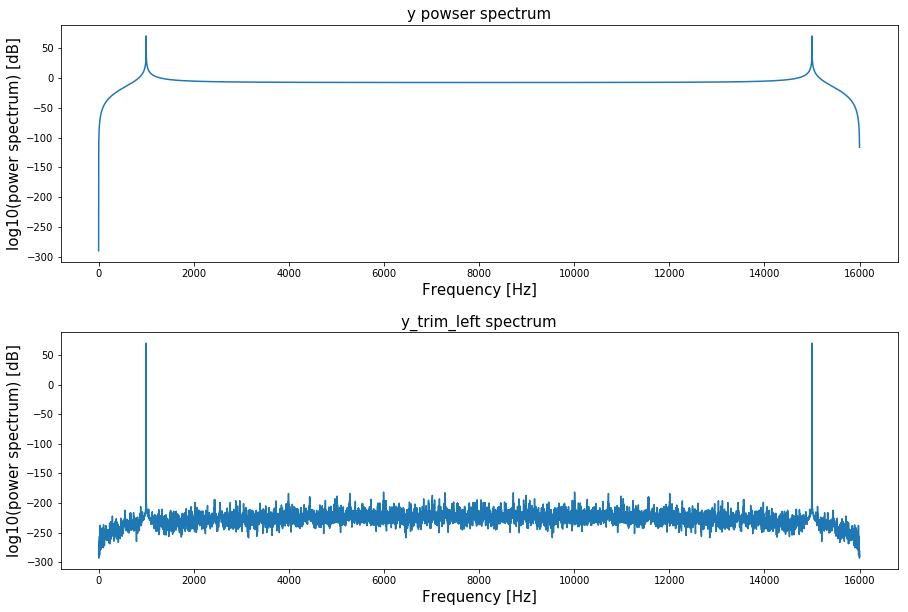

In [284]:
################################################################################
fig = plt.figure(figsize=(15, 10))
nrow, ncol = 2, 1
########################################
ax = fig.add_subplot(nrow, ncol, 1)
ax.plot(np.arange(fs),
        20*np.log10(abs(y_fourier[:fs])))
ax.set_title(label="y powser spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
ax = fig.add_subplot(nrow, ncol, 2)
ax.plot(np.arange(fs),
        20*np.log10(abs(y_trim_left_fourier)))
ax.set_title(label="y_trim_left spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
plt.subplots_adjust(hspace=0.3)
plt.show()
# 一定周期の線スペクトルが現れる.
# 周波数スペクトルは不連続な離散系であり,線スペクトル

#### np.fft.rfft

In [285]:
y_fourier = np.fft.rfft(a=y)
print("y_fourier.shape : {}".format(y_fourier.shape))
print("y_fourier[0]    : {}".format(y_fourier[0]))

y_trim_left_fourier = np.fft.rfft(a=y_trim_left)
print("y_trim_left_fourier.shape : {}".format(y_trim_left_fourier.shape))
print("y_trim_left_fourier[0]    : {}".format(y_trim_left_fourier[0]))

y_fourier.shape : (8001,)
y_fourier[0]    : (-3.4416913763379853e-15+0j)
y_trim_left_fourier.shape : (8001,)
y_trim_left_fourier[0]    : (7.105427357601002e-14+0j)


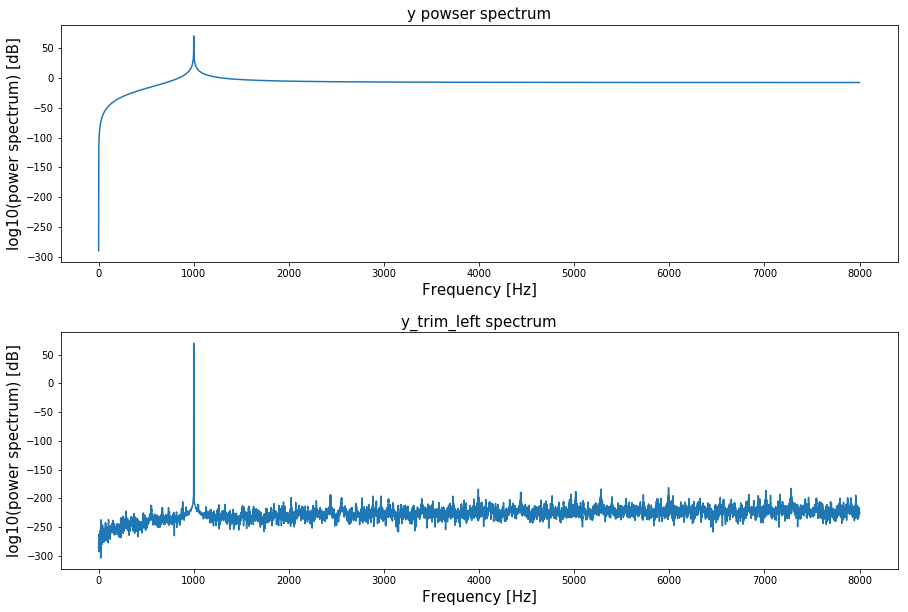

In [286]:
################################################################################
fig = plt.figure(figsize=(15, 10))
nrow, ncol = 2, 1
########################################
ax = fig.add_subplot(nrow, ncol, 1)
ax.plot(np.arange(len(y_fourier)),
        20*np.log10(abs(y_fourier)))
ax.set_title(label="y powser spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
ax = fig.add_subplot(nrow, ncol, 2)
ax.plot(np.arange(len(y_trim_left_fourier)),
        20*np.log10(abs(y_trim_left_fourier)))
ax.set_title(label="y_trim_left spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
plt.subplots_adjust(hspace=0.3)
plt.show()
# 一定周期の線スペクトルが現れる.
# 周波数スペクトルは不連続な離散系であり,線スペクトル

### matlab wavewrite
- [wavwrite (MATLAB Functions)](http://matlab.izmiran.ru/help/techdoc/ref/wavwrite.html)
  - > wavwrite(y,Fs,'filename') writes the data stored in the variable y to a WAVE file called filename.
    The data has a sample rate of Fs Hz and is assumed to be __16-bit__.
    Amplitude values outside the range [-1,+1] are clipped prior to writing.
- [python - How to generate audio from a numpy array? - Stack Overflow](https://stackoverflow.com/questions/10357992/how-to-generate-audio-from-a-numpy-array)
- [scipy.io.wavfile.write — SciPy v1.2.0 Reference Guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html)
  - scipyでは`float16`がなかったので`float32`で代用する

table : scipy.io.wavfile.write

| WAV    | format         | Min         | Max         | NumPy dtype |
| ---    | ---            | ---         | ---         | ---         |
| 32-bit | floating-point | -1.0        | +1.0        | float32     |
| 32-bit | PCM            | -2147483648 | +2147483647 | int32       |
| 16-bit | PCM            | -32768      | +32767      | int16       |
| 8-bit  | PCM            | 0           | 255         | uint8       |

In [287]:
# xの音声ファイル作成(再掲)
from scipy.io import wavfile

_wave_file = "./sample01_x.wav"
_x = np.float32(x)
wavfile.write(filename=_wave_file,
              rate=fs,  # サンプリング周波数
              data=_x)

In [288]:
# yの音声ファイル作成

_wave_file = "./sample01_y.wav"
_y = np.float32(y)
wavfile.write(filename=_wave_file,
              rate=fs,  # サンプリング周波数
              data=_y)

## Sample 3

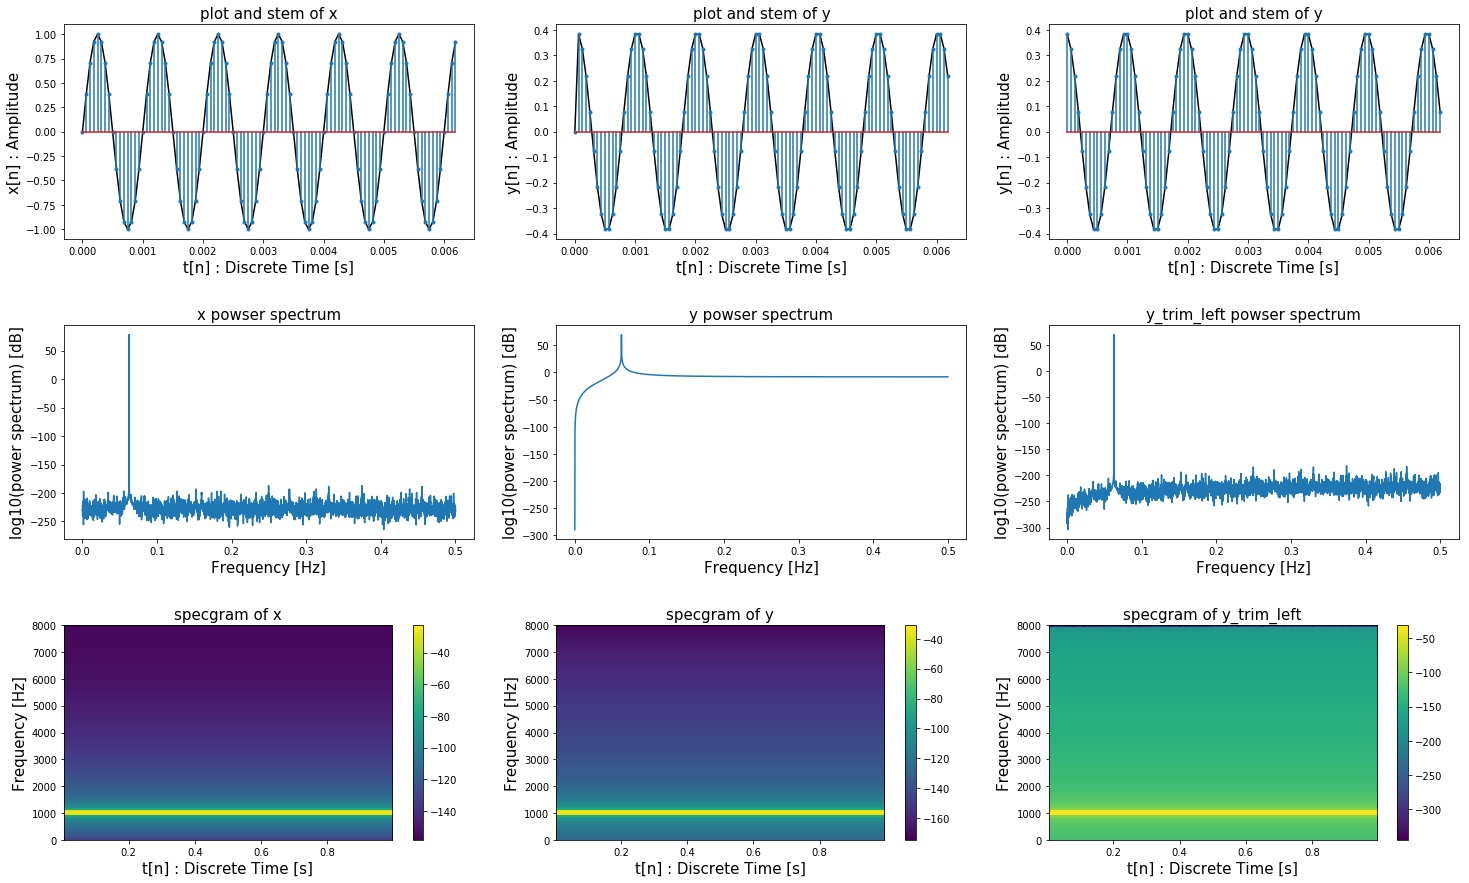

In [298]:
idx_start = 0
idx_end   = 100
################################################################################
fig = plt.figure(figsize=(25,15))
nrow, ncol = 3, 3
plot_idx = 0
############################################################
############################################################
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
ax.plot(t[idx_start:idx_end], x[idx_start:idx_end], color="black")
ax.stem(t[idx_start:idx_end], x[idx_start:idx_end],
        linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax.set_title(label="plot and stem of x",         fontsize=15)
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="x[n] : Amplitude", fontsize=15)
########################################
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
ax.plot(t[idx_start:idx_end], y[idx_start:idx_end], color="black")
ax.stem(t[idx_start:idx_end], y[idx_start:idx_end],
        linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax.set_title(label="plot and stem of y",         fontsize=15)
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="y[n] : Amplitude", fontsize=15)
########################################
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
ax.plot(t[idx_start:idx_end], y_trim_left[idx_start:idx_end], color="black")
ax.stem(t[idx_start:idx_end], y_trim_left[idx_start:idx_end],
        linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax.set_title(label="plot and stem of y",         fontsize=15)
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="y[n] : Amplitude", fontsize=15)
############################################################
############################################################
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
_x_fourier = np.fft.rfft(x)
ax.plot(t[:len(_x_fourier)],
        20*np.log10(abs(_x_fourier)))
ax.set_title(label="x powser spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
_y_fourier = np.fft.rfft(y)
ax.plot(t[:len(_y_fourier)],
         20*np.log10(abs(_y_fourier)))
ax.set_title(label="y powser spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
_y_fourier = np.fft.rfft(y_trim_left)
ax.plot(t[:len(_y_fourier)],
         20*np.log10(abs(_y_fourier)))
ax.set_title(label="y_trim_left powser spectrum", fontsize=15)
ax.set_xlabel(xlabel="Frequency [Hz]", fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
############################################################
############################################################
idx_start = 0
idx_end   = fs
NFFT      = 256
noverlap  = NFFT / 2
########################################
# specgram : STFT (short-time fourier transform) の計算をしているだけ
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=x[idx_start:idx_end],  # data
                NFFT=NFFT,               # The number of data points used in each block for the FFT.
                Fs=fs,                   # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                noverlap=128)            # STFTのずらし幅
ax.set_title(label="specgram of x",              fontsize=15)
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="Frequency [Hz]",           fontsize=15)
fig.colorbar(mappable=_im, ax=ax)
########################################
# specgram : STFT (short-time fourier transform) の計算をしているだけ
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=y[idx_start:idx_end],  # data
                NFFT=NFFT,               # The number of data points used in each block for the FFT.
                Fs=fs,                   # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                noverlap=128)            # STFTのずらし幅
ax.set_title(label="specgram of y",              fontsize=15)
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="Frequency [Hz]",           fontsize=15)
fig.colorbar(mappable=_im, ax=ax)
########################################
# specgram : STFT (short-time fourier transform) の計算をしているだけ
plot_idx += 1
ax = fig.add_subplot(nrow, ncol, plot_idx)
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=y_trim[idx_start:idx_end],  # data
                NFFT=NFFT,               # The number of data points used in each block for the FFT.
                Fs=fs,                   # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                noverlap=128)            # STFTのずらし幅
ax.set_title(label="specgram of y_trim_left", fontsize=15)
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="Frequency [Hz]",           fontsize=15)
fig.colorbar(mappable=_im, ax=ax)
############################################################
############################################################
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

## Sample 4
　入力信号の周波数を $2000$ Hzで試す

In [265]:
freq = 2000
x = np.sin(2*np.pi*freq*t)
y = np.convolve(a=x, v=h)

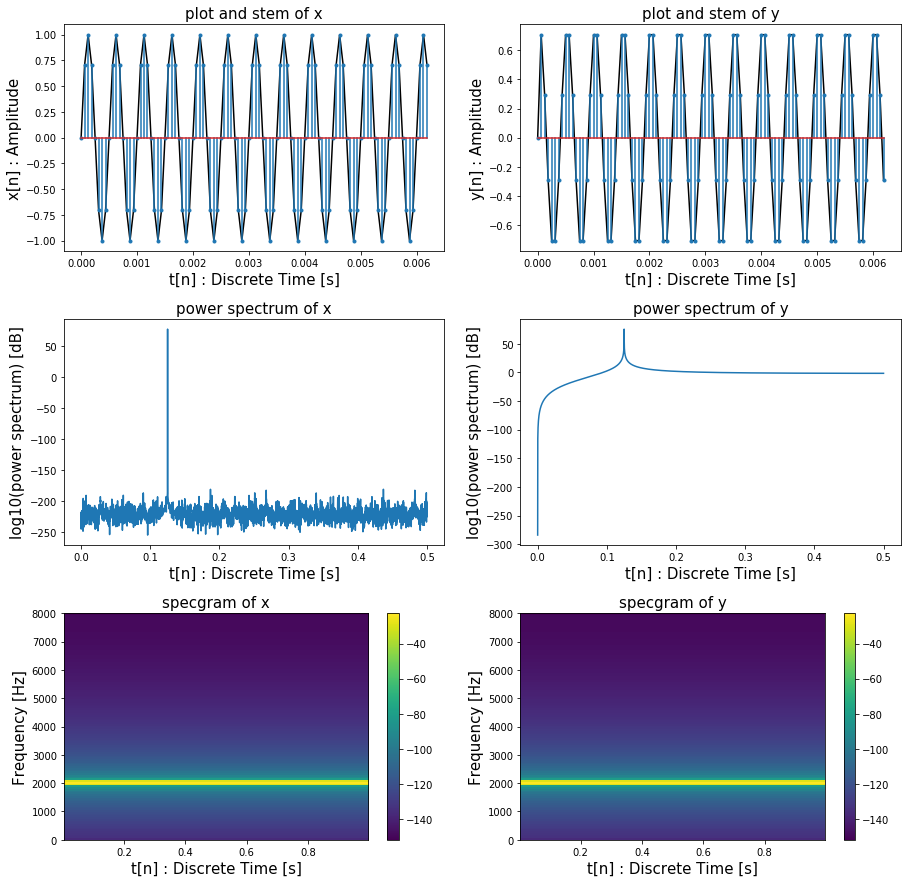

In [266]:
idx_start = 0
idx_end   = 100

################################################################################
fig = plt.figure(figsize=(15,15))
nrow = 3
ncol = 2
########################################
ax1 = fig.add_subplot(nrow, ncol, 1)
ax1.plot(t[idx_start:idx_end], x[idx_start:idx_end], color="black")
ax1.stem(t[idx_start:idx_end], x[idx_start:idx_end],
         linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax1.set_title(label="plot and stem of x",         fontsize=15)
ax1.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax1.set_ylabel(ylabel="x[n] : Amplitude", fontsize=15)
########################################
ax2 = fig.add_subplot(nrow, ncol, 2)
ax2.plot(t[idx_start:idx_end], y[idx_start:idx_end], color="black")
ax2.stem(t[idx_start:idx_end], y[idx_start:idx_end],
         linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax2.set_title(label="plot and stem of y",         fontsize=15)
ax2.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax2.set_ylabel(ylabel="y[n] : Amplitude", fontsize=15)
########################################
ax3 = fig.add_subplot(nrow, ncol, 3)
_x_fourier = np.fft.rfft(x)
ax3.plot(t[:len(_x_fourier)],
         20*np.log10(abs(_x_fourier)))
ax3.set_title(label="power spectrum of x",          fontsize=15)
ax3.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax3.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
ax4 = fig.add_subplot(nrow, ncol, 4)
_y_fourier = np.fft.rfft(y)
ax4.plot(t[:len(_y_fourier)],
         20*np.log10(abs(_y_fourier)))
ax4.set_title(label="power spectrum of y",          fontsize=15)
ax4.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax4.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
########################################
idx_start = 0
idx_end   = fs
NFFT      = 256
noverlap  = NFFT / 2
########################################
# specgram : STFT (short-time fourier transform) の計算をしているだけ
ax5 = fig.add_subplot(nrow, ncol, 5)
_spectrum, _freqs, _t, _im = \
    ax5.specgram(x=x[idx_start:idx_end],  # data
                 NFFT=NFFT,               # The number of data points used in each block for the FFT.
                 Fs=fs,                   # sampling frequency
                 window=matplotlib.mlab.window_hanning,  # 窓関数
                 noverlap=128)            # STFTのずらし幅
ax5.set_title(label="specgram of x",              fontsize=15)
ax5.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax5.set_ylabel(ylabel="Frequency [Hz]",           fontsize=15)
fig.colorbar(mappable=_im, ax=ax5)
########################################
# specgram : STFT (short-time fourier transform) の計算をしているだけ
ax6 = fig.add_subplot(nrow, ncol, 6)
_spectrum, _freqs, _t, _im = \
    ax6.specgram(x=x[idx_start:idx_end],  # data
                 NFFT=NFFT,               # The number of data points used in each block for the FFT.
                 Fs=fs,                   # sampling frequency
                 window=matplotlib.mlab.window_hanning,  # 窓関数
                 noverlap=128)            # STFTのずらし幅
ax6.set_title(label="specgram of y",              fontsize=15)
ax6.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax6.set_ylabel(ylabel="Frequency [Hz]",           fontsize=15)
fig.colorbar(mappable=_im, ax=ax6)
########################################
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

## Sample 5
　複合音(様々な正弦信号の和で表される音)で試す. あらゆる信号は,フーリエ級数の形,すなわち正弦はの和の成分に分解できる.

In [267]:
x = np.random.rand(fs) - 0.5
y = np.convolve(a=x, v=h)

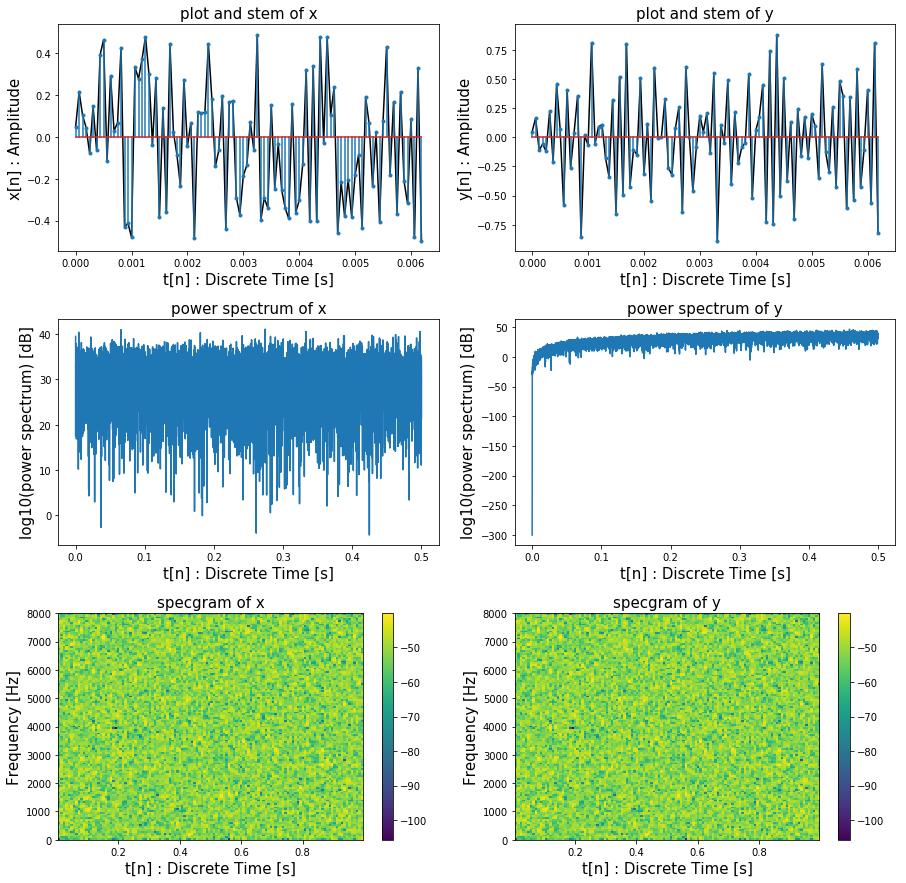

In [268]:
idx_start = 0
idx_end   = 100

################################################################################
fig = plt.figure(figsize=(15,15))
nrow = 3
ncol = 2
########################################
ax1 = fig.add_subplot(nrow, ncol, 1)
ax1.plot(t[idx_start:idx_end], x[idx_start:idx_end], color="black")
ax1.stem(t[idx_start:idx_end], x[idx_start:idx_end],
         linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax1.set_title(label="plot and stem of x",         fontsize=15)
ax1.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax1.set_ylabel(ylabel="x[n] : Amplitude", fontsize=15)
########################################
ax2 = fig.add_subplot(nrow, ncol, 2)
ax2.plot(t[idx_start:idx_end], y[idx_start:idx_end], color="black")
ax2.stem(t[idx_start:idx_end], y[idx_start:idx_end],
         linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax2.set_title(label="plot and stem of y",         fontsize=15)
ax2.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax2.set_ylabel(ylabel="y[n] : Amplitude", fontsize=15)
########################################
ax3 = fig.add_subplot(nrow, ncol, 3)
_x_fourier = np.fft.rfft(x)
ax3.plot(t[:len(_x_fourier)],
         20*np.log10(abs(_x_fourier)))
ax3.set_title(label="power spectrum of x",          fontsize=15)
ax3.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax3.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
ax4 = fig.add_subplot(nrow, ncol, 4)
_y_fourier = np.fft.rfft(y)
ax4.plot(t[:len(_y_fourier)],
         20*np.log10(abs(_y_fourier)))
ax4.set_title(label="power spectrum of y",          fontsize=15)
ax4.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax4.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
########################################
########################################
idx_start = 0
idx_end   = fs
NFFT      = 256
noverlap  = NFFT / 2
########################################
# specgram : STFT (short-time fourier transform) の計算をしているだけ
ax5 = fig.add_subplot(nrow, ncol, 5)
_spectrum, _freqs, _t, _im = \
    ax5.specgram(x=x[idx_start:idx_end],  # data
                 NFFT=NFFT,               # The number of data points used in each block for the FFT.
                 Fs=fs,                   # sampling frequency
                 window=matplotlib.mlab.window_hanning,  # 窓関数
                 noverlap=128)            # STFTのずらし幅
ax5.set_title(label="specgram of x",              fontsize=15)
ax5.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax5.set_ylabel(ylabel="Frequency [Hz]",           fontsize=15)
fig.colorbar(mappable=_im, ax=ax5)
########################################
# specgram : STFT (short-time fourier transform) の計算をしているだけ
ax6 = fig.add_subplot(nrow, ncol, 6)
_spectrum, _freqs, _t, _im = \
    ax6.specgram(x=x[idx_start:idx_end],  # data
                 NFFT=NFFT,               # The number of data points used in each block for the FFT.
                 Fs=fs,                   # sampling frequency
                 window=matplotlib.mlab.window_hanning,  # 窓関数
                 noverlap=128)            # STFTのずらし幅
ax6.set_title(label="specgram of y",              fontsize=15)
ax6.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax6.set_ylabel(ylabel="Frequency [Hz]",           fontsize=15)
fig.colorbar(mappable=_im, ax=ax6)
########################################
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

## END